In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def read_csv(path, nrows=None):
    """Reads dataset from CSV file, with optional number of rows"""
    
    df = pd.read_csv(path, nrows=nrows)
    df['click_time'] = pd.to_datetime(df['click_time'])
    df.set_index('click_time', inplace=True)
    df.sort_index(inplace=True)
    
    return df



In [3]:
#Training data set
dataset_train = read_csv("data/train_sample.csv")

# Benchmark test
dataset_test = read_csv("data/train.csv", nrows = 10000)

#Larger test,

dataset_test_all = read_csv("data/test.csv")


Data Exploration

In [4]:
dataset_train.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [5]:
df = dataset_train.nunique()
pd.DataFrame({"atribute": df.index,"unique_values": df.values})


,atribute,unique_values
0,ip,34857
1,app,161
2,device,100
3,os,130
4,channel,161
5,attributed_time,227
6,is_attributed,2


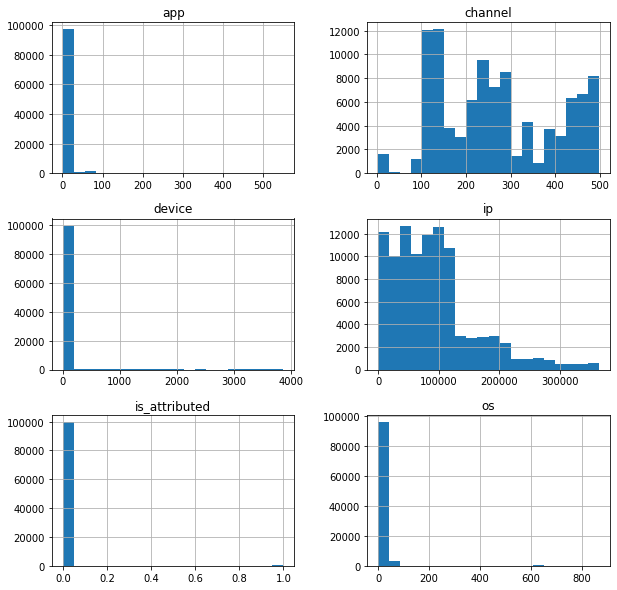

In [6]:
dataset_train.hist(bins=20, figsize=(10,10));

In [7]:
corr = dataset_train.corr()
corr.style.background_gradient()


,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000


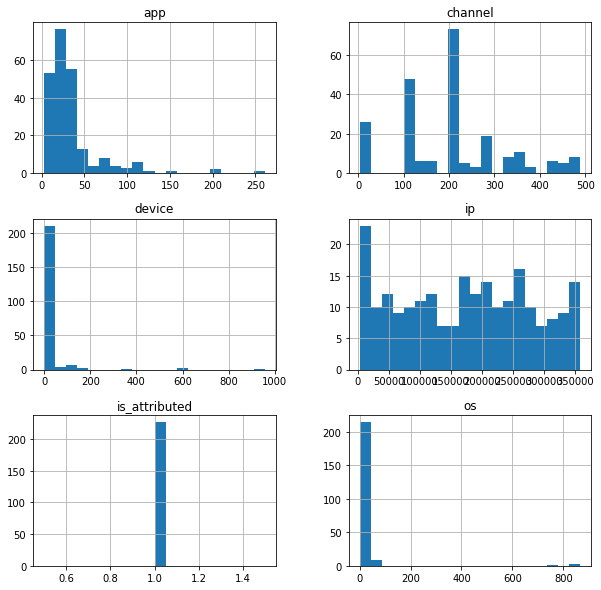

In [8]:
dataset_train[(dataset_train["is_attributed"]==1)].hist(bins = 20,figsize =(10,10));

In [9]:
top_apps = dataset_train.groupby(["app"])["is_attributed"].agg(is_attributed="sum")
top_apps.sort_values("is_attributed",ascending= False).head(10)

,is_attributed
app,
19,70
35,27
29,22
10,18
5,14
45,11
9,8
72,6
18,5


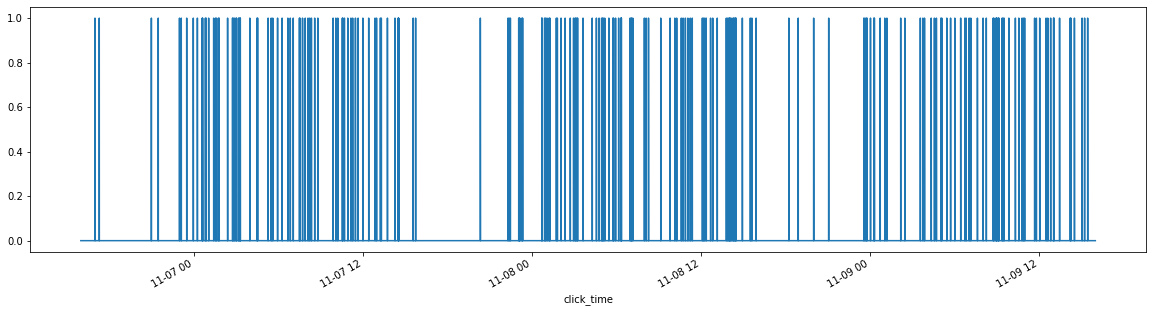

In [10]:
dataset_train.apply(lambda x: 1 if x["is_attributed"] == 1 else 0,axis=1).plot(figsize=(20,5));

Benchmark Models

In [11]:
benchmark_const = dataset_test_all[["click_id"]].copy()
benchmark_const["is_attributed"] = 0
benchmark_const.set_index("click_id",inplace=True)

In [12]:
benchmark_const

,is_attributed
click_id,
0,0
1,0
2,0
3,0
4,0
...,...
18790464,0
18790465,0
18790467,0


In [13]:
benchmark_const.to_csv("data/benchmark_const.csv")

# Preprocessing
* Extract hour of the day
 * Valid clicks are coming during the day
* For each attribute extract duration since last click with that attribute
 * Fraud might reuse same IP,app or device
* Remove attributes: attributed_time, click_time, is_attributed
 * Not need for the model


In [19]:
def prepare_dataset(df):
    df["hour"] = df.index.hour
    df["click_time"] = df.index
    
    return df.drop(labels =["attributed_time","click_time","is_attributed"],axis=1,errors="ignore")

In [20]:
train_X = prepare_dataset(dataset_train)

In [21]:
train_y  = data

DatetimeIndex(['2017-11-06 16:00:00', '2017-11-06 16:00:09',
               '2017-11-06 16:00:09', '2017-11-06 16:00:11',
               '2017-11-06 16:00:11', '2017-11-06 16:00:13',
               '2017-11-06 16:00:19', '2017-11-06 16:00:20',
               '2017-11-06 16:00:20', '2017-11-06 16:00:21',
               ...
               '2017-11-09 15:59:33', '2017-11-09 15:59:34',
               '2017-11-09 15:59:36', '2017-11-09 15:59:39',
               '2017-11-09 15:59:41', '2017-11-09 15:59:42',
               '2017-11-09 15:59:43', '2017-11-09 15:59:44',
               '2017-11-09 15:59:46', '2017-11-09 15:59:51'],
              dtype='datetime64[ns]', name='click_time', length=100000, freq=None)